In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# daatset api
!kaggle competitions download -c cifar-10

100% 713M/715M [00:08<00:00, 142MB/s]
100% 715M/715M [00:08<00:00, 87.1MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.4 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall(path='/content/training data')     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
!ls

 cifar-10.zip   sample_data	       test.7z	 'training data'
 kaggle.json    sampleSubmission.csv   train.7z   trainLabels.csv


In [ ]:
# The OS module in Python provides functions for interacting with the operating system
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
file_names = os.listdir('/content/training data/train')

In [ ]:
type(file_names)

list

In [ ]:
len(file_names)

50000

In [ ]:
# showing some sample of the images
print(file_names[0:5])
print(file_names[-5:])

['28132.png', '9560.png', '26148.png', '47266.png', '34136.png']
['48966.png', '29732.png', '16627.png', '6334.png', '8552.png']


In [ ]:
# labels processing //
label_dataframe = pd.read_csv('/content/trainLabels.csv')
label_dataframe.shape

(50000, 2)

In [ ]:
label_dataframe.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
label_dataframe.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
label_dataframe[label_dataframe['id']==28132]

,id,label
28131,28132,cat


In [ ]:
# we can see easily , the images are not ordered in the dataset
# but id's are in order

label_dataframe.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
label_dataframe.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
# we can do encoding three methods : manually-replace wala thing , one-hot encoding , label encoder ( used for creating a big no. of labels , also when we dont care about labels )

# we'll do manual encoding here - we'll make only 10 labels
label_dataframe['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
label_dataframe['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [ ]:
label_dict = {
    'frog':0,'truck':1,'deer':2,'automobile':3,'bird':4,'horse':5,'ship':6,'cat':7,'dog':8,'airplane':9
}

labels = [label_dict[i] for i in label_dataframe['label']]

In [ ]:
print(labels)

[0, 1, 1, 2, 3, 3, 4, 5, 6, 7, 2, 5, 5, 4, 1, 1, 1, 7, 4, 0, 2, 7, 0, 0, 4, 0, 7, 8, 2, 9, 9, 1, 3, 7, 2, 9, 7, 5, 7, 7, 8, 4, 4, 5, 3, 3, 3, 4, 4, 9, 1, 8, 5, 1, 4, 4, 8, 4, 2, 7, 3, 3, 6, 4, 3, 3, 2, 1, 5, 6, 8, 1, 0, 5, 7, 3, 1, 9, 7, 3, 7, 8, 2, 8, 5, 5, 2, 5, 1, 2, 4, 7, 6, 9, 3, 0, 3, 3, 2, 3, 6, 7, 1, 0, 0, 3, 6, 8, 4, 1, 1, 6, 3, 5, 5, 9, 9, 0, 1, 3, 4, 4, 1, 4, 0, 0, 3, 1, 8, 9, 2, 5, 0, 5, 3, 6, 3, 3, 4, 6, 3, 7, 7, 0, 4, 2, 1, 1, 8, 2, 7, 0, 5, 2, 0, 6, 8, 8, 2, 7, 3, 6, 2, 5, 0, 9, 1, 8, 3, 7, 6, 4, 5, 8, 7, 2, 3, 8, 5, 9, 2, 5, 8, 8, 3, 9, 1, 0, 1, 9, 6, 5, 6, 6, 4, 8, 4, 7, 8, 9, 0, 3, 1, 7, 0, 1, 3, 7, 1, 0, 0, 5, 3, 9, 1, 8, 6, 8, 4, 1, 9, 6, 6, 9, 0, 1, 3, 3, 0, 7, 5, 0, 0, 9, 0, 0, 3, 5, 3, 8, 6, 7, 0, 0, 6, 0, 6, 2, 0, 0, 3, 7, 6, 7, 2, 3, 5, 3, 7, 6, 8, 3, 3, 2, 9, 1, 7, 5, 2, 1, 1, 4, 2, 1, 1, 3, 9, 8, 1, 9, 6, 4, 3, 4, 9, 8, 0, 7, 4, 5, 6, 6, 0, 9, 5, 1, 2, 8, 0, 2, 4, 3, 3, 4, 3, 8, 1, 1, 9, 6, 2, 3, 3, 0, 7, 7, 1, 9, 5, 1, 5, 5, 1, 3, 8, 3, 0, 0, 6, 5, 3, 7, 9, 

In [ ]:
print(labels[0:5])
print(labels[-5:])

[0, 1, 1, 2, 3]
[4, 0, 1, 3, 3]


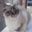

In [ ]:
# displaying sample images
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/training data/train/28132.png')
cv2_imshow(image)


In [ ]:
# making an id list of 50,000 images
id_list = list(label_dataframe['id'])


In [ ]:
print(id_list[0:5])

[1, 2, 3, 4, 5]


In [ ]:
# Image Processing //
# train_data_folder = '/content/training data/train/'
# data = []
# for id in id_list :
#   path = train_data_folder + str(id) + '.png'
#   print(path)
#   if(id>5):
#     break

/content/training data/train/1.png
/content/training data/train/2.png
/content/training data/train/3.png
/content/training data/train/4.png
/content/training data/train/5.png
/content/training data/train/6.png


In [ ]:
train_data_folder = '/content/training data/train/'
data = []
for id in id_list :
  image = Image.open(train_data_folder+str(id)+'.png')
  image = np.asarray(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
len(data)

50000

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
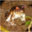

In [ ]:
data[0]

In [ ]:
# as we see these data and labels are lists , we need to make them numpy arrays
X = np.asarray(data)
Y = np.asarray(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
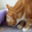

In [ ]:
X_train[0]

In [ ]:
# Building the neural network //

import tensorflow as tf
from tensorflow import keras

In [ ]:
# setting up the layers for the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),

])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# training the model
model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.9990 - accuracy: 0.2659 - val_loss: 1.8754 - val_accuracy: 0.3090
Epoch 2/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.8692 - accuracy: 0.3221 - val_loss: 1.8267 - val_accuracy: 0.3410
Epoch 3/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8430 - accuracy: 0.3302 - val_loss: 1.8254 - val_accuracy: 0.3265
Epoch 4/10
1125/1125 [==============================] - 6s 6ms/step - loss: 1.8289 - accuracy: 0.3347 - val_loss: 1.8054 - val_accuracy: 0.3475
Epoch 5/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8191 - accuracy: 0.3392 - val_loss: 1.8507 - val_accuracy: 0.3180
Epoch 6/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8127 - accuracy: 0.3428 - val_loss: 1.8246 - val_accuracy: 0.3275
Epoch 7/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.8044 - accuracy: 0.3460 - val_loss: 1.7984 - val_accuracy:

In [ ]:
# we can see easily , that we have a very very low accuracy , so we'll take help of transfer learing and use a pre-trained model
# ResNet50

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# upsampling is done to make an unbalanced dataset balanced
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
print('Very informative project !')

Very informative project !


In [ ]:
print('20+ LPA pls bg')

20+ LPA pls bg
